# Description
link/ https://www.propertyfinder.eg/en/search?c=1&fu=0&ob=mr&page=1

### The data comes from the propertyfinder site

Propertyfinder is a Developer of a real estate rental marketplace designed to connect property seekers to real estate agents. The company's marketplace allows filtered searching of available options for properties to buy from apartments to villas, townhouses, penthouses, compounds, offices, and plots of land, enabling customers to find real estate properties that fit their requirements.

11200 rows, 11 cols

Numerical & Categorical

Missing Values included (not significant, small number)

Outliers included

Can be used for EDA & Visualization or Prediction

I will predict the price of the property in every governorate depend on the address ,area, size of property, number of rooms and other Vactor.
#### Sample Questions:
Is there a correlation between the city of property and the price?

Is the area effect the price more or the number of rooms? 

Which city is the most expensive in housing price?

Which property type is most expensive ?

Which company sell more in the site?

make a model for Property Price Prediction

## Here is the way I get the data from the site

In [141]:
#import libraries
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
from tld import get_fld
import time
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import pickle


In [76]:
# scrapeing the data feom the site
base_url = 'https://www.propertyfinder.eg/en/search?c=1&fu=0&ob=mr&page={}'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

property_type = []
bedroom_numbers = []
bathroom_numbers = []
areas = []
descriptions = []
links = []
titil=[]
prices = []
locations = []

# Loop through multiple pages
for page in range(1, 600):  
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    
    # Send the request
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all listings 
    listings = soup.find_all('li', attrs={'role':'listitem'})

    # Loop through each listing and extract the necessary information
    for listing in listings:
        property_text = listing.find('p', class_='styles-module_content__property-type__QuVl4')
        bedroom_text = listing.find('p', attrs={'data-testid': 'property-card-spec-bedroom'})
        bathroom_text = listing.find('p', attrs={'data-testid': 'property-card-spec-bathroom'})
        area_text = listing.find('p', attrs={'data-testid': 'property-card-spec-area'})
        description_text = listing.find('h2', class_='styles-module_content__title__eOEkd')
        link_tag = listing.find('a', class_='property-card-module_property-card__link__L6AKb')
        titils = listing.find('img', attrs={'data-testid': 'gallery-picture'})


        
        price_text = listing.find('p', class_='styles-module_content__price__SgQ5p')
        location_text = listing.find('p', class_='styles-module_content__location__bNgNM')

        # Extract text and handle None values
        property_type.append(property_text.text.strip() if property_text else 'N/A')
        bedroom_numbers.append(bedroom_text.text.strip() if bedroom_text else 'N/A')
        bathroom_numbers.append(bathroom_text.text.strip() if bathroom_text else 'N/A')
        areas.append(area_text.text.strip() if area_text else 'N/A')
        descriptions.append(description_text.text.strip() if description_text else 'N/A')
        links.append( link_tag['href'] if link_tag else 'N/A')
        titil.append(titils['title'] if titils and titils.has_attr('title') else 'N/A')
        prices.append(price_text.text.strip() if price_text else 'N/A')
        locations.append(location_text.text.strip() if location_text else 'N/A')

# Create a DataFrame
df = pd.DataFrame({'property_type': property_type,
    'address': locations,
    'bedroom_number': bedroom_numbers,
    'bathroom_number': bathroom_numbers,
    'area': areas,
    'description': descriptions,
    'link': links,
    'titil':titil,
    'price': prices,})

# Save the DataFrame to a CSV file
df.to_csv('property_listings.csv', index=False)

print("Data saved to property_listings.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [2]:
# read dataframeg
df=pd.read_csv('property_listings.csv')
df.head()

property_type                                            address  \
0     Apartment   Rock Eden, Hadayek October, 6 October City, Giza   
1     Townhouse  La Verde Casette, New Capital Compounds, New C...   
2     Apartment  Badya Palm Hills, 6 October Compounds, 6 Octob...   
3     Apartment  Mountain View iCity, 5th Settlement Compounds,...   
4     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   

  bedroom_number bathroom_number     area  \
0              3               3  190 sqm   
1              3               4  284 sqm   
2              3               3  143 sqm   
3              3               3  210 sqm   
4              3               2  165 sqm   

                                         description  \
0       apartment 190 for sale in Rock Eden Compound   
1  Villa in prime location  New Capital, 10% disc...   
2      Apartment Resale Ready to Move Prime Location   
3         Ready to move Semi Finished prime location   
4      Distinctive apartment in the Fifth Settlement   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
1  https://www.propertyfinder.eg/en/plp/buy/townh...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil          price  
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...  8,134,029 EGP  
1  Townhouse - 3 Bedrooms - 4 Bathrooms for sale ...  Ask for price  
2  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...  4,500,000 EGP  
3  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...  8,600,000 EGP  
4  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...  8,415,000 EGP

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14979 entries, 0 to 14978
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    14979 non-null  object
 1   address          14979 non-null  object
 2   bedroom_number   14925 non-null  object
 3   bathroom_number  14931 non-null  object
 4   area             14979 non-null  object
 5   description      14979 non-null  object
 6   link             14979 non-null  object
 7   titil            14979 non-null  object
 8   price            14979 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


In [4]:
# split the address column to governorate,City and address_only column
df['governorate']=df['address'].apply(lambda x: x.split(',')[-1])
df['City']=df['address'].apply(lambda x: x.split(',')[-2])
df['address_only'] = df['address'].apply(lambda x: ','.join(x.split(',')[0:-2]))

In [5]:
value_counts_gov = df['governorate'].value_counts()
value_counts_gov

 Cairo             6363
 North Coast       3967
 Giza              3283
 Suez               560
 Red Sea            407
 Alexandria         252
 South Sainai        51
 Al Daqahlya         37
 Matrouh             27
 Qalyubia            15
 Demyat               6
 Sharqia              4
 Port Saeed           2
 Al Menya             2
 Kafr El Sheikh       1
 Al Fayum             1
 El Esmailia          1
Name: governorate, dtype: int64

In [6]:
#remove the governomat that less that 52 rows
gov_to_remove = value_counts_gov[value_counts_gov < 127].index
df = df[~df['governorate'].isin(gov_to_remove)]

In [7]:
df['governorate'].value_counts()

 Cairo          6363
 North Coast    3967
 Giza           3283
 Suez            560
 Red Sea         407
 Alexandria      252
Name: governorate, dtype: int64

In [8]:
value_counts_cit = df['City'].value_counts()
value_counts_cit

 New Cairo City       3753
 6 October City       1733
 Sheikh Zayed City    1344
 Ras Al Hekma         1318
 Sidi Abdel Rahman     962
                      ... 
Sakkara                  1
 Hay Shobra              1
Dokki                    1
Al Nakheel Beach         1
 Hadayek El Kobba        1
Name: City, Length: 89, dtype: int64

In [9]:
#remove the city that less that 100 rows

cit_to_remove = value_counts_cit[value_counts_cit < 100].index
df = df[~df['City'].isin(cit_to_remove)]

In [10]:
df['City'].value_counts()

 New Cairo City                  3753
 6 October City                  1733
 Sheikh Zayed City               1344
 Ras Al Hekma                    1318
 Sidi Abdel Rahman                962
 Mostakbal City - Future City     947
 Al Ain Al Sokhna                 557
 Qesm Marsa Matrouh               466
 Hurghada                         401
 New Alamein City                 361
 Qesm Ad Dabaah                   329
 New Capital City                 325
Madinaty                          301
 Shorouk City                     281
 Al Alamein                       240
 Hay El Maadi                     175
 Hay Sharq                        147
 New Heliopolis                   120
 Mokattam                         102
Name: City, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 0 to 14978
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    13862 non-null  object
 1   address          13862 non-null  object
 2   bedroom_number   13824 non-null  object
 3   bathroom_number  13825 non-null  object
 4   area             13862 non-null  object
 5   description      13862 non-null  object
 6   link             13862 non-null  object
 7   titil            13862 non-null  object
 8   price            13862 non-null  object
 9   governorate      13862 non-null  object
 10  City             13862 non-null  object
 11  address_only     13862 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [12]:
# get counts to property type to determine which property not important and delete it
value_counts = df['property_type'].value_counts()
value_counts

Apartment          6097
Chalet             2757
Villa              2155
Townhouse          1071
Twin House          622
Duplex              440
Penthouse           384
iVilla              207
Hotel Apartment      49
Land                 29
Cabin                17
Palace               12
Whole Building        8
Roof                  5
Full Floor            4
Half Floor            4
Bungalow              1
Name: property_type, dtype: int64

In [13]:
value_counts = df['property_type'].value_counts()
property_type_to_remove = value_counts[value_counts < 300].index
df = df[~df['property_type'].isin(property_type_to_remove)]


In [14]:
df['property_type'].value_counts()

Apartment     6097
Chalet        2757
Villa         2155
Townhouse     1071
Twin House     622
Duplex         440
Penthouse      384
Name: property_type, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13526 entries, 0 to 14978
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    13526 non-null  object
 1   address          13526 non-null  object
 2   bedroom_number   13526 non-null  object
 3   bathroom_number  13519 non-null  object
 4   area             13526 non-null  object
 5   description      13526 non-null  object
 6   link             13526 non-null  object
 7   titil            13526 non-null  object
 8   price            13526 non-null  object
 9   governorate      13526 non-null  object
 10  City             13526 non-null  object
 11  address_only     13526 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [16]:
# cheack if there are any string value in bedroom column
df['bedroom_number'].unique()

array(['3', '7+', '2', '4', '1', '5', '6', '7', 'studio'], dtype=object)

In [17]:
# becouse the studio has 1 room i will replace studio by 1
df['bedroom_number'] = df['bedroom_number'].replace('studio', '1')

In [18]:
df['bedroom_number'].unique()

array(['3', '7+', '2', '4', '1', '5', '6', '7'], dtype=object)

In [19]:
#replace every +7 by 7 
df['bedroom_number'] = df['bedroom_number'].replace('7+', '7')

In [20]:
# convert 'bedroom_number' the column to integer
df['bedroom_number']=df['bedroom_number'].astype(int)

In [21]:
df['bathroom_number'].unique()

array(['3', '4', '2', '5', '1', '6', '7+', nan, '7'], dtype=object)

In [22]:
# determine which row in 'bathroom_number' nan
df.dropna(inplace=True)

In [23]:
#replace every +7 by 7 
df['bathroom_number'] = df['bathroom_number'].replace('7+', '7')

In [24]:
# convert 'bathroom_number' the column to integer
df['bathroom_number']=df['bathroom_number'].astype(int)


In [26]:
df['bathroom_number'].unique()

array([3, 4, 2, 5, 1, 6, 7])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13519 entries, 0 to 14978
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    13519 non-null  object
 1   address          13519 non-null  object
 2   bedroom_number   13519 non-null  int32 
 3   bathroom_number  13519 non-null  int32 
 4   area             13519 non-null  object
 5   description      13519 non-null  object
 6   link             13519 non-null  object
 7   titil            13519 non-null  object
 8   price            13519 non-null  object
 9   governorate      13519 non-null  object
 10  City             13519 non-null  object
 11  address_only     13519 non-null  object
dtypes: int32(2), object(10)
memory usage: 1.2+ MB


In [29]:
# delete the string value "sqm" from area column and handel commas that representing thousands.

df['area'] = df['area'].str.replace('sqm', '').str.replace(',', '').astype(int)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13519 entries, 0 to 14978
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    13519 non-null  object
 1   address          13519 non-null  object
 2   bedroom_number   13519 non-null  int32 
 3   bathroom_number  13519 non-null  int32 
 4   area             13519 non-null  int32 
 5   description      13519 non-null  object
 6   link             13519 non-null  object
 7   titil            13519 non-null  object
 8   price            13519 non-null  object
 9   governorate      13519 non-null  object
 10  City             13519 non-null  object
 11  address_only     13519 non-null  object
dtypes: int32(3), object(9)
memory usage: 1.2+ MB


In [31]:
# some price have string word 'Ask for price' ,we will count them
df[df['price']=='Ask for price'].value_counts().sum()

363

In [32]:
# I will delete all row contain 'Ask for price' because the price is important factor, and the number of this row is small
df = df[df['price'] != 'Ask for price']

In [33]:
# delet 'EGP' from price and handel commas that representing thousands and convert it to integer
df['price']=df['price'].str.replace('EGP','').str.replace(',','').astype(int)

In [34]:
# convert price to million
df['price']=df['price']/1000000

In [35]:
df = df.rename(columns={'price': 'price_in_million'})


In [36]:
df['price_of_squre_meter_in_million']=df['price_in_million']/df['area']

In [37]:
df.head()

property_type                                            address  \
0     Apartment   Rock Eden, Hadayek October, 6 October City, Giza   
2     Apartment  Badya Palm Hills, 6 October Compounds, 6 Octob...   
3     Apartment  Mountain View iCity, 5th Settlement Compounds,...   
4     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
5         Villa  Katameya Gardens, El Katameya Compounds, El Ka...   

   bedroom_number  bathroom_number  area  \
0               3                3   190   
2               3                3   143   
3               3                3   210   
4               3                2   165   
5               7                5   804   

                                     description  \
0   apartment 190 for sale in Rock Eden Compound   
2  Apartment Resale Ready to Move Prime Location   
3     Ready to move Semi Finished prime location   
4  Distinctive apartment in the Fifth Settlement   
5       Villa in the Fifth Settlement behind AUC   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   
5  https://www.propertyfinder.eg/en/plp/buy/villa...   

                                               titil  price_in_million  \
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...          8.134029   
2  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...          4.500000   
3  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...          8.600000   
4  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...          8.415000   
5  Villa - 5 Bathrooms for sale in Katameya Garde...         50.000000   

  governorate             City  \
0        Giza   6 October City   
2        Giza   6 October City   
3       Cairo   New Cairo City   
4       Cairo   New Cairo City   
5       Cairo   New Cairo City   

                                        address_only  \
0                         Rock Eden, Hadayek October   
2              Badya Palm Hills, 6 October Compounds   
3  Mountain View iCity, 5th Settlement Compounds,...   
4  Nest Cairo, 5th Settlement Compounds, The 5th ...   
5  Katameya Gardens, El Katameya Compounds, El Ka...   

   price_of_squre_meter_in_million  
0                         0.042811  
2                         0.031469  
3                         0.040952  
4                         0.051000  
5                         0.062189

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 14978
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    13156 non-null  object 
 1   address                          13156 non-null  object 
 2   bedroom_number                   13156 non-null  int32  
 3   bathroom_number                  13156 non-null  int32  
 4   area                             13156 non-null  int32  
 5   description                      13156 non-null  object 
 6   link                             13156 non-null  object 
 7   titil                            13156 non-null  object 
 8   price_in_million                 13156 non-null  float64
 9   governorate                      13156 non-null  object 
 10  City                             13156 non-null  object 
 11  address_only                     13156 non-null  object 
 12  price_of_squre_met

In [39]:
df.describe()

bedroom_number  bathroom_number          area  price_in_million  \
count    13156.000000     13156.000000  13156.000000      13156.000000   
mean         2.977197         2.796671    200.440711         11.906575   
std          1.084466         1.192753    266.885105         15.422901   
min          1.000000         1.000000      1.000000          0.100000   
25%          2.000000         2.000000    123.000000          4.200000   
50%          3.000000         3.000000    164.500000          7.700000   
75%          3.000000         3.000000    225.000000         13.801573   
max          7.000000         7.000000  23651.000000        318.500000   

       price_of_squre_meter_in_million  
count                     13156.000000  
mean                          0.060171  
std                           0.156585  
min                           0.000070  
25%                           0.027439  
50%                           0.050000  
75%                           0.077966  
max                          12.800000

Do some EDA and visualization

In [40]:
# Function to detect outliers using IQR
def detect_outliers_via_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [41]:
# apply the outlier detection for the 'price_of_squre_meter_in_million' column to each categury 
data_cleaned = df.groupby(['property_type', 'governorate', 'City']).apply(lambda group: detect_outliers_via_iqr(group, 'price_of_squre_meter_in_million'))
data_cleaned.reset_index(drop=True, inplace=True)

In [42]:
# apply the outlier detection for the 'price_in_million' column to each categury 
data_cleaned = df.groupby(['property_type', 'governorate', 'City']).apply(lambda group: detect_outliers_via_iqr(group, 'price_in_million'))
data_cleaned.reset_index(drop=True, inplace=True)

In [43]:
# Now apply the outlier detection for the 'area_cleaned' column
data_cleaned = data_cleaned.groupby(['property_type', 'governorate', 'City']).apply(lambda group: detect_outliers_via_iqr(group, 'area'))
data_cleaned.reset_index(drop=True, inplace=True)

In [44]:
# Display the cleaned dataset's size to confirm outliers were removed
data_cleaned.shape

(12544, 13)

In [45]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12544 entries, 0 to 12543
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    12544 non-null  object 
 1   address                          12544 non-null  object 
 2   bedroom_number                   12544 non-null  int32  
 3   bathroom_number                  12544 non-null  int32  
 4   area                             12544 non-null  int32  
 5   description                      12544 non-null  object 
 6   link                             12544 non-null  object 
 7   titil                            12544 non-null  object 
 8   price_in_million                 12544 non-null  float64
 9   governorate                      12544 non-null  object 
 10  City                             12544 non-null  object 
 11  address_only                     12544 non-null  object 
 12  price_of_squre_met

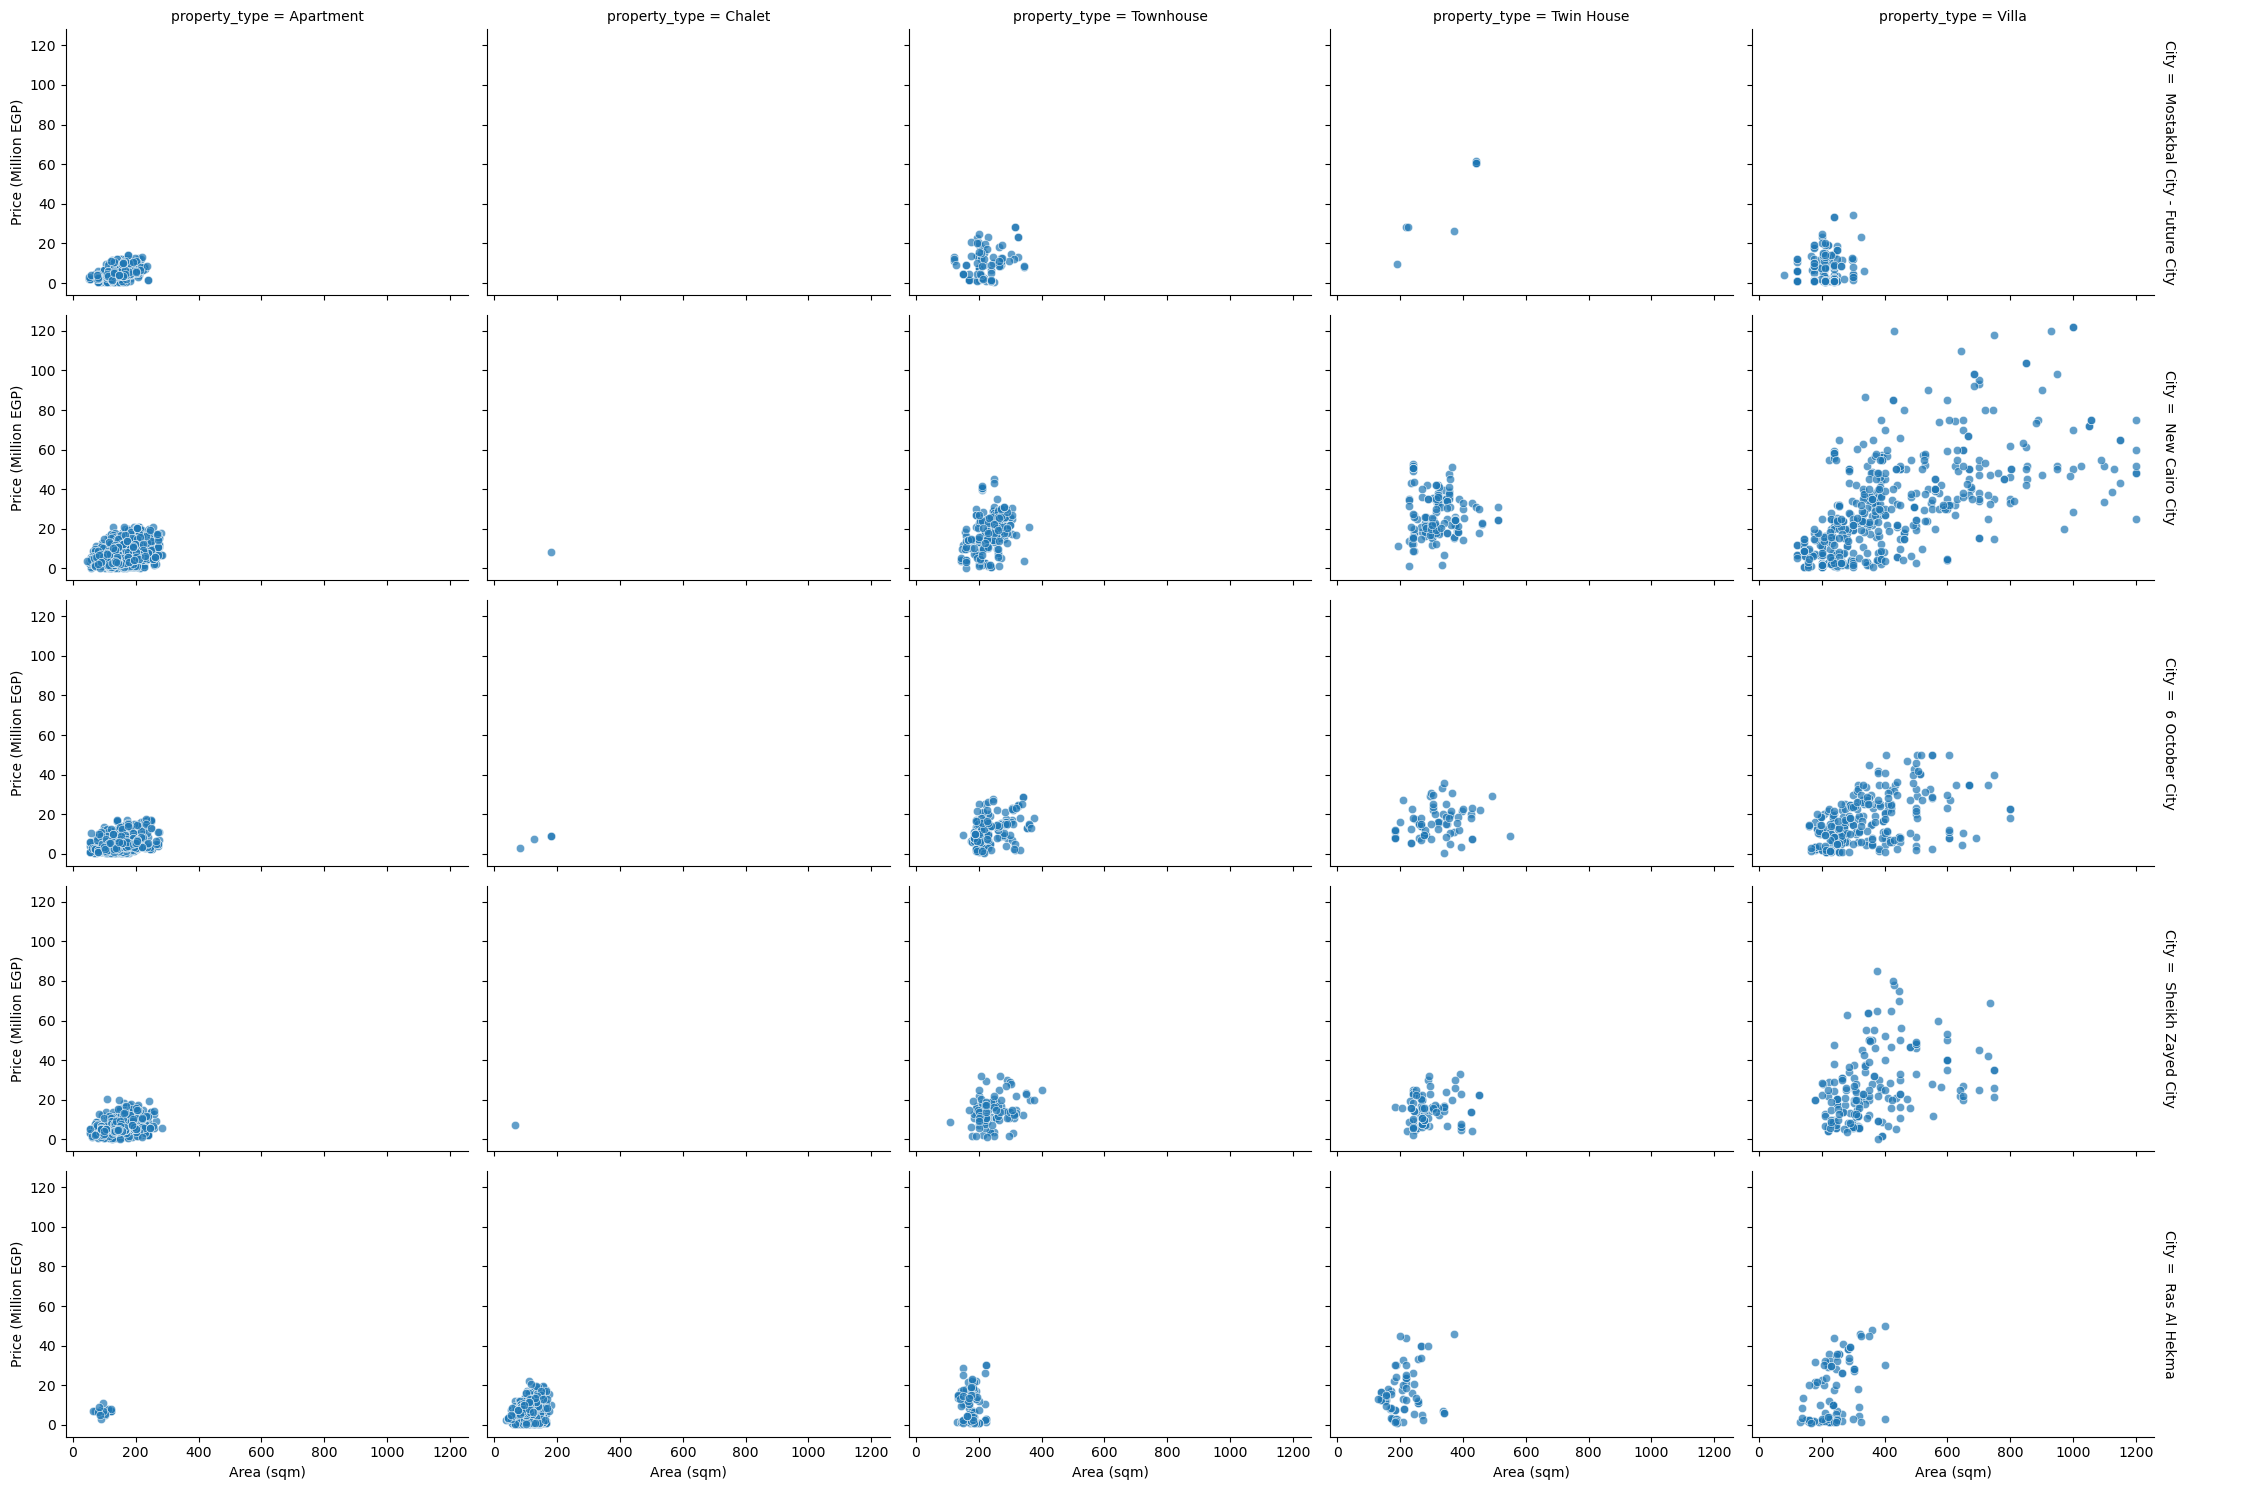

In [46]:
# Filter to the top 5 cities, top 5 property types, for visualization
top_cities = data_cleaned['City'].value_counts().nlargest(5).index
top_property_types = data_cleaned['property_type'].value_counts().nlargest(5).index

filtered_data = data_cleaned[
    data_cleaned['City'].isin(top_cities) & 
    data_cleaned['property_type'].isin(top_property_types) 
]

# Create the scatter plots for the filtered data
g = sns.FacetGrid(filtered_data, col="property_type", row="City", palette="tab10", margin_titles=True, height=3, aspect=1.5)
g.map(sns.scatterplot, "area", "price_in_million", alpha=.7)
g.add_legend()
g.set_axis_labels("Area (sqm)", "Price (Million EGP)")

plt.show()


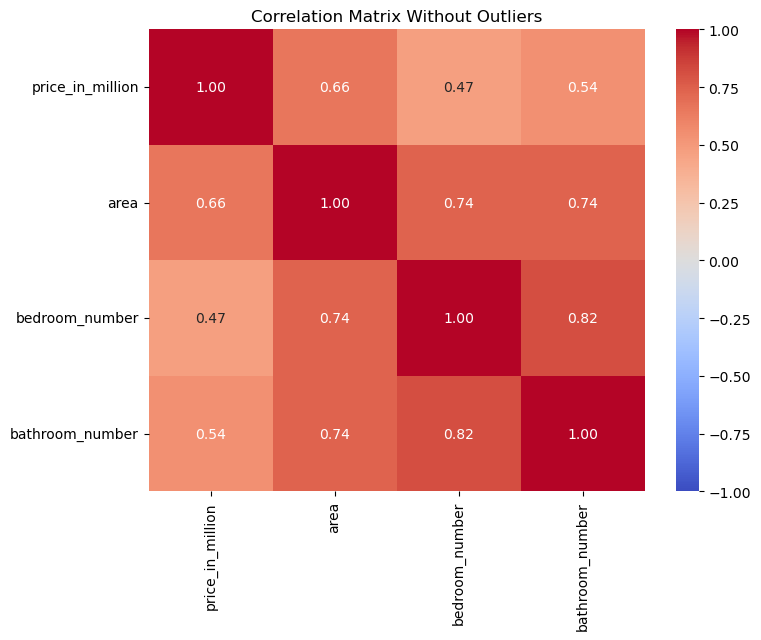

In [47]:
# Re-analyze correlations without outliers
correlation_matrix_no_outliers = data_cleaned[['price_in_million', 'area', 'bedroom_number', 'bathroom_number']].corr()

# Plot the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Without Outliers')
plt.show()

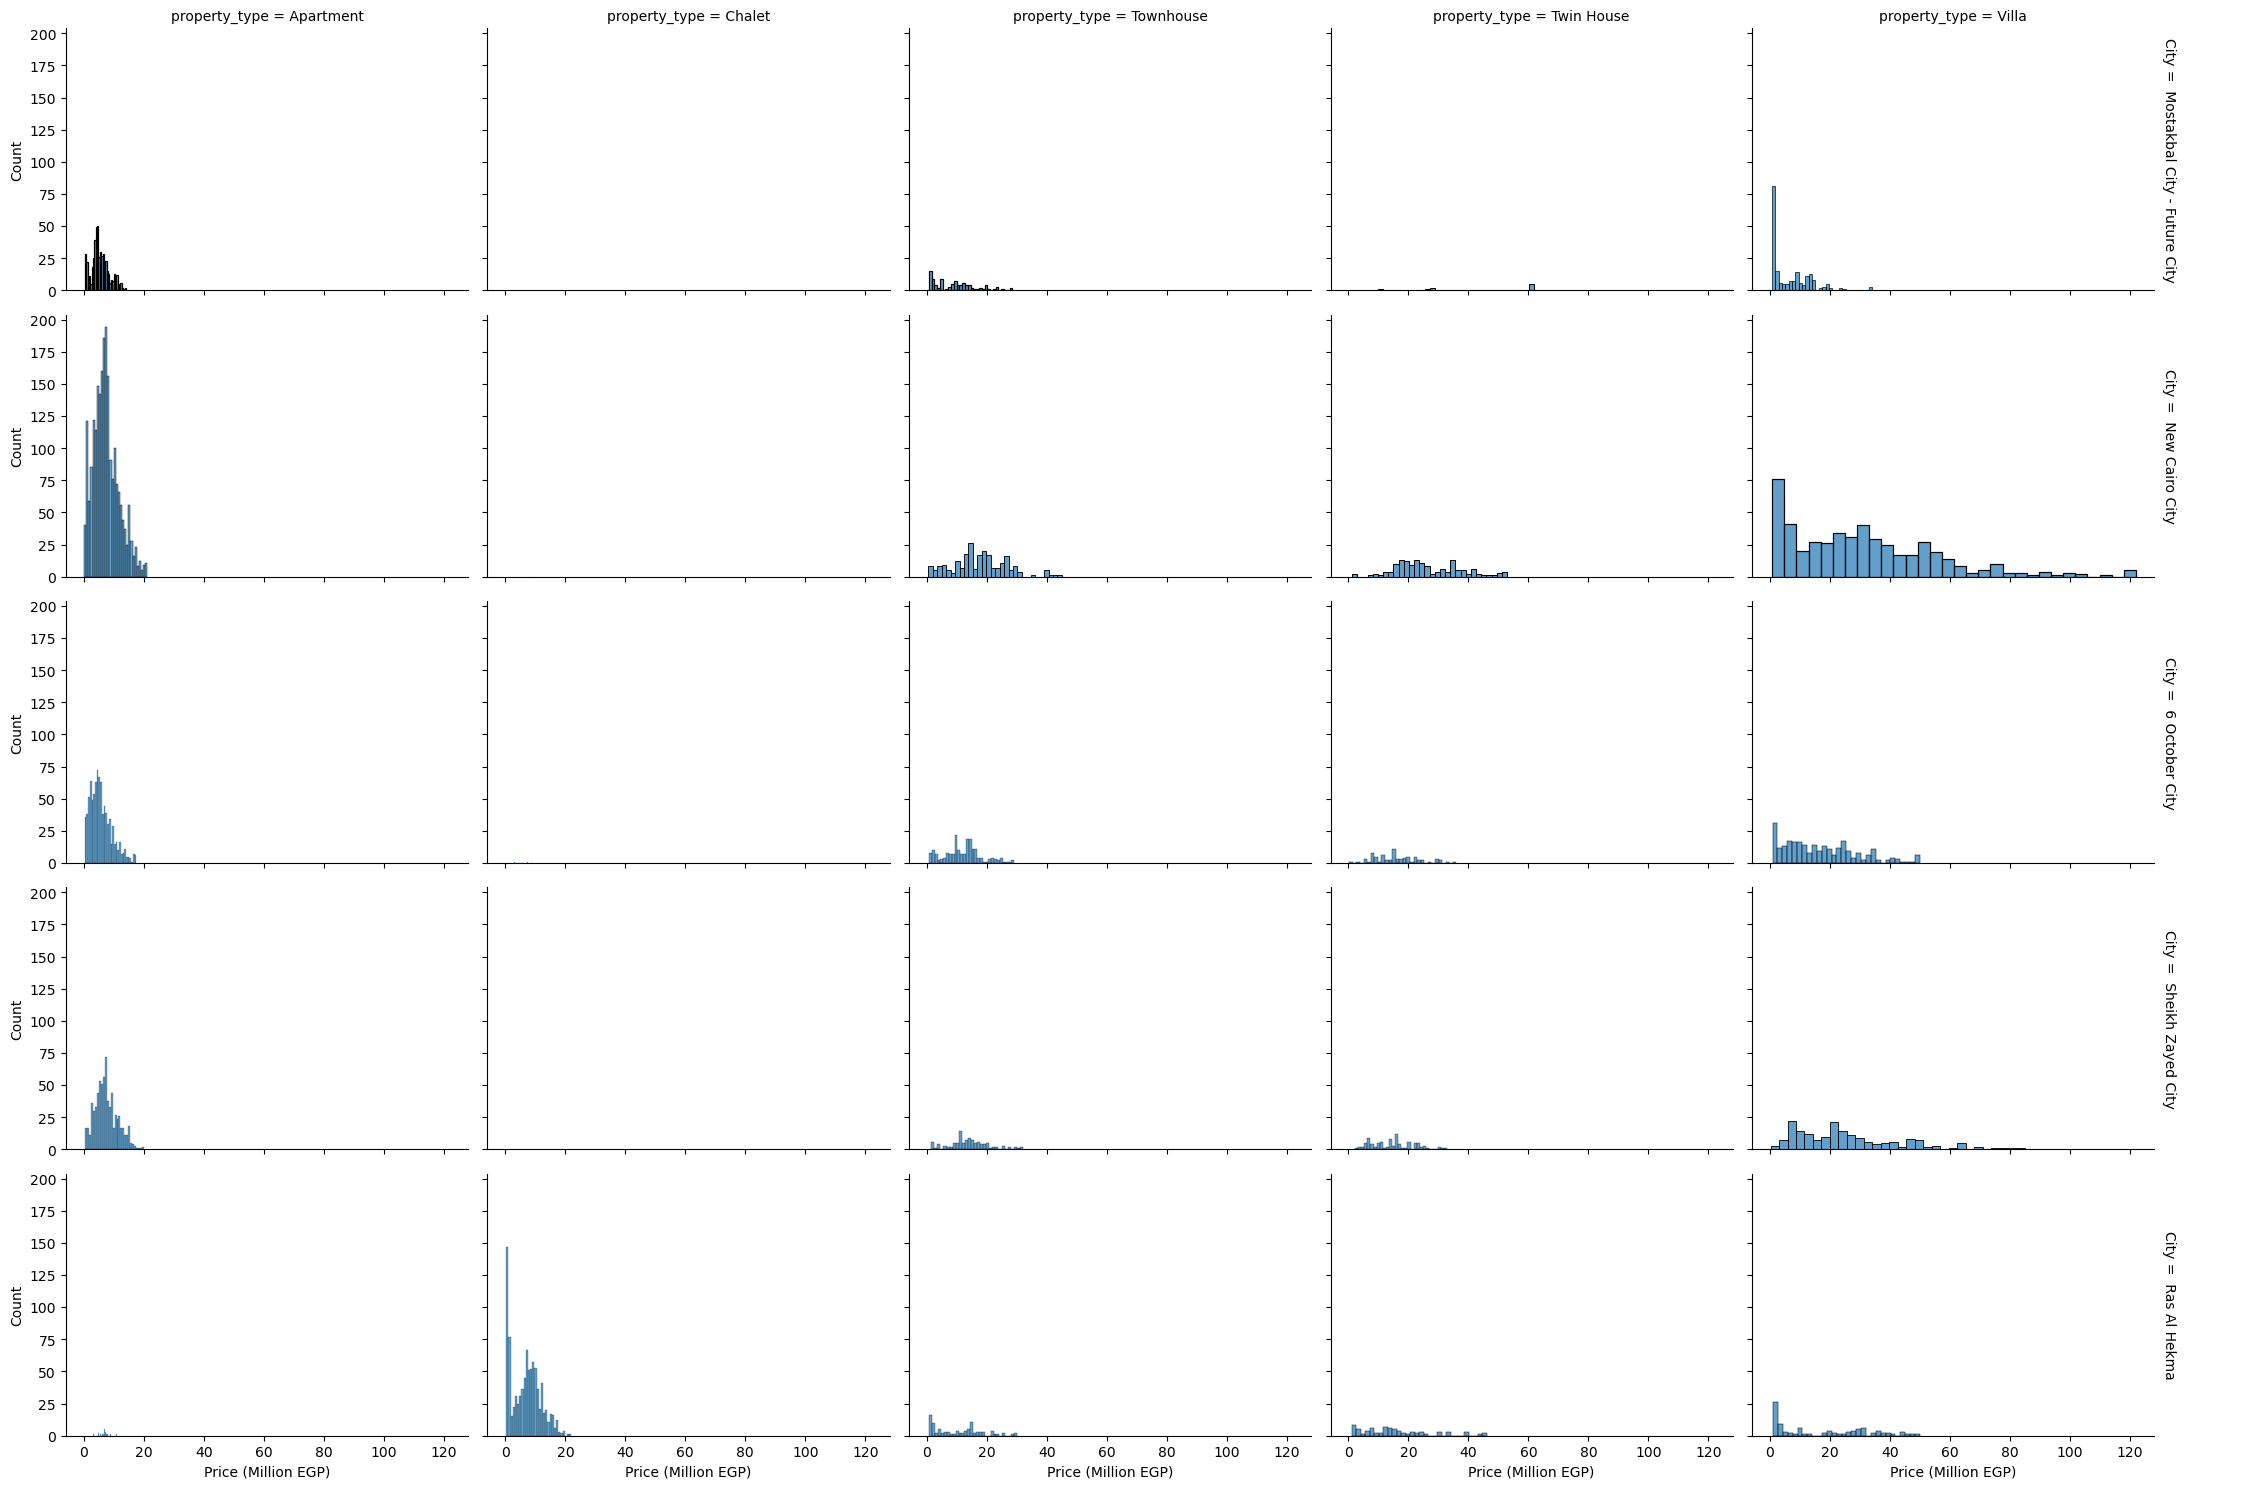

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to the top 5 cities and top 5 property types for visualization
top_cities = data_cleaned['City'].value_counts().nlargest(5).index
top_property_types = data_cleaned['property_type'].value_counts().nlargest(5).index

filtered_data = data_cleaned[
    data_cleaned['City'].isin(top_cities) & 
    data_cleaned['property_type'].isin(top_property_types)
]

# Create the histograms for the filtered data
g = sns.FacetGrid(filtered_data, col="property_type", row="City", palette="tab10", margin_titles=True, height=3, aspect=1.5)
g.map(sns.histplot, "price_in_million", bins=30, alpha=.7)  # Use histplot for histogram
g.add_legend()
g.set_axis_labels("Price (Million EGP)", "Count")

plt.show()


In [49]:
# Calculate the average price for each combination of property type, governorate, and city
average_price_by_location = data_cleaned.groupby(['property_type', 'governorate', 'City'])['price_in_million'].mean().reset_index()

# Rename columns for clarity
average_price_by_location.columns = ['property_type', 'governorate', 'City', 'average_price']

# Display the results
average_price_by_location


property_type   governorate                           City  average_price
0       Apartment    Alexandria                      Hay Sharq       5.335572
1       Apartment         Cairo                   Hay El Maadi       4.606922
2       Apartment         Cairo                       Mokattam       2.731776
3       Apartment         Cairo   Mostakbal City - Future City       5.392033
4       Apartment         Cairo                 New Cairo City       7.447937
..            ...           ...                            ...            ...
113         Villa   North Coast             Qesm Marsa Matrouh      40.843728
114         Villa   North Coast                   Ras Al Hekma      17.254058
115         Villa   North Coast              Sidi Abdel Rahman      45.570457
116         Villa       Red Sea                       Hurghada      16.727963
117         Villa          Suez               Al Ain Al Sokhna      12.865986

[118 rows x 4 columns]

In [50]:
average_price_by_location['average_price'].min()

2.7317761904761904

In [51]:
# Calculate the average price for each property type
average_price_by_p = data_cleaned.groupby(['property_type'])['price_in_million'].mean().reset_index()

# Rename columns for clarity
average_price_by_p.columns = ['property_type', 'average_price']

# Display the results
average_price_by_p

property_type  average_price
0     Apartment       6.446246
1        Chalet       7.793012
2        Duplex      10.307478
3     Penthouse      10.608654
4     Townhouse      14.553778
5    Twin House      21.315569
6         Villa      24.232617

In [52]:
# Define the list of property types for which we want to filter out the rows
property_types_to_filter = ['villa', 'Twin House', 'Townhouse', 'Penthouse', 'Duplex']

# Filter out rows where price_in_million is less than 3 million for the specified property types
data_cleaned = data_cleaned[~((data_cleaned['property_type'].isin(property_types_to_filter)) & (data_cleaned['price_in_million'] < 3))]

# Optional: Verify the removal
data_cleaned.head()


property_type                                            address  \
0     Apartment     Stanley Bridge, Stanley, Hay Sharq, Alexandria   
1     Apartment    Ismail Serry St., Smouha, Hay Sharq, Alexandria   
2     Apartment    Ismail Serry St., Smouha, Hay Sharq, Alexandria   
3     Apartment         Al Geish Road, Glim, Hay Sharq, Alexandria   
4     Apartment  14th of May Bridge Road, Smouha, Hay Sharq, Al...   

   bedroom_number  bathroom_number  area  \
0               3                3   185   
1               2                1   100   
2               2                1   100   
3               2                1   120   
4               2                1   111   

                                        description  \
0                   Apartment for sale 185m Stanley   
1   Apartment for sale in Smouha (Ismail Serry St.)   
2   Apartment for sale in Smouha (Ismail Serry St.)   
3  Licensed apartment - The view is open to the sea   
4       Own your apartment at Smouha Class Compound   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
1  https://www.propertyfinder.eg/en/plp/buy/apart...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil  price_in_million  \
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...              7.20   
1  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.60   
2  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.60   
3  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.60   
4  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.45   

   governorate        City                     address_only  \
0   Alexandria   Hay Sharq          Stanley Bridge, Stanley   
1   Alexandria   Hay Sharq         Ismail Serry St., Smouha   
2   Alexandria   Hay Sharq         Ismail Serry St., Smouha   
3   Alexandria   Hay Sharq              Al Geish Road, Glim   
4   Alexandria   Hay Sharq  14th of May Bridge Road, Smouha   

   price_of_squre_meter_in_million  
0                         0.038919  
1                         0.026000  
2                         0.026000  
3                         0.021667  
4                         0.022072

In [53]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    12322 non-null  object 
 1   address                          12322 non-null  object 
 2   bedroom_number                   12322 non-null  int32  
 3   bathroom_number                  12322 non-null  int32  
 4   area                             12322 non-null  int32  
 5   description                      12322 non-null  object 
 6   link                             12322 non-null  object 
 7   titil                            12322 non-null  object 
 8   price_in_million                 12322 non-null  float64
 9   governorate                      12322 non-null  object 
 10  City                             12322 non-null  object 
 11  address_only                     12322 non-null  object 
 12  price_of_squre_met

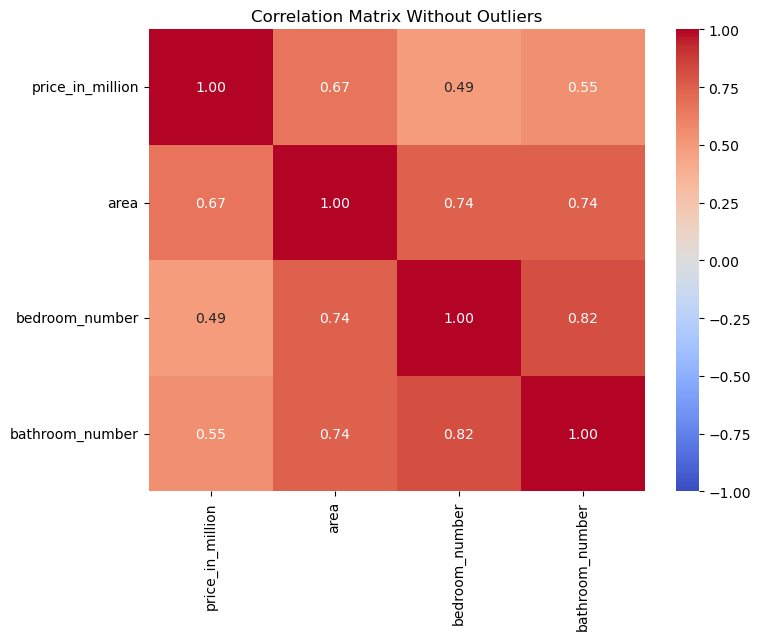

In [54]:
# Re-analyze correlations without outliers
correlation_matrix_no_outliers = data_cleaned[['price_in_million', 'area', 'bedroom_number', 'bathroom_number']].corr()

# Plot the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Without Outliers')
plt.show()

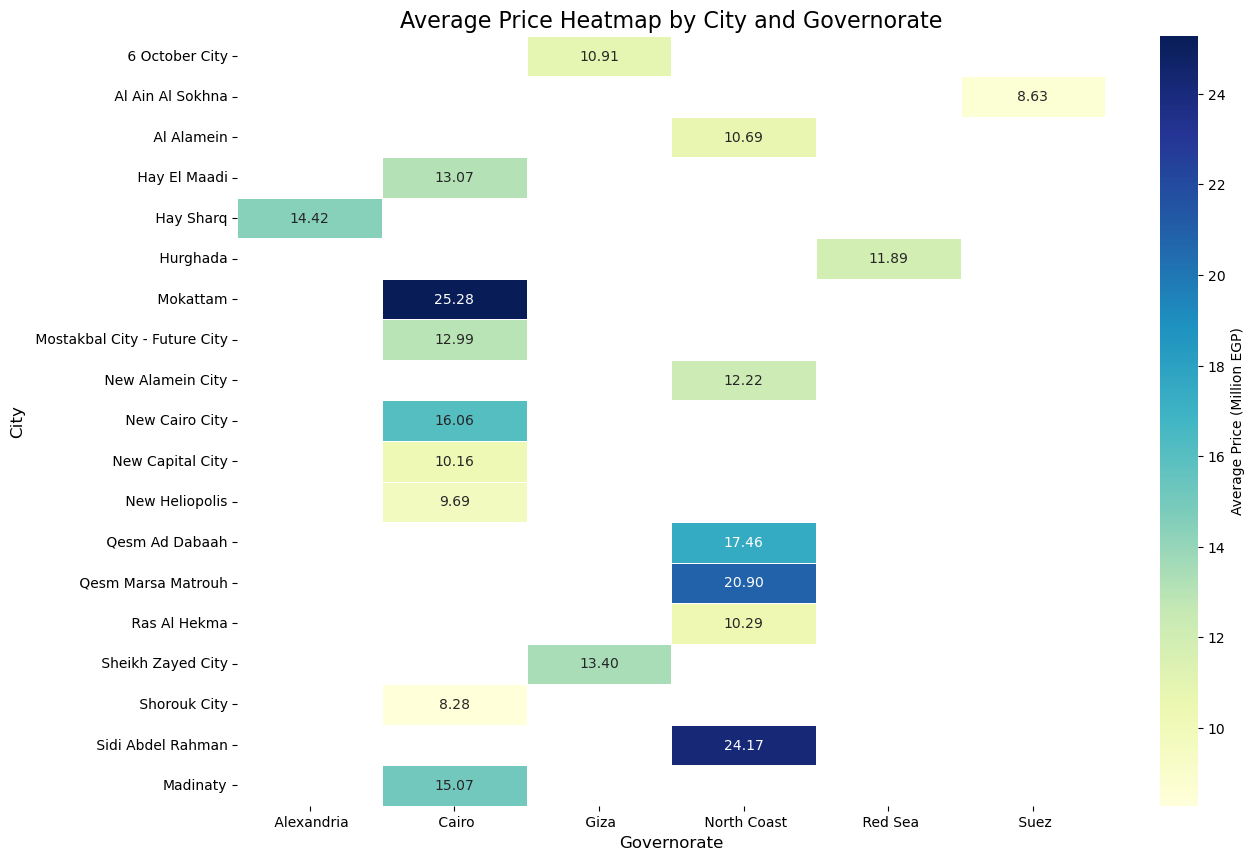

In [55]:
# Pivot the data for heatmap visualization
pivot_table = average_price_by_location.pivot_table(
    index='City', 
    columns='governorate', 
    values='average_price',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Average Price (Million EGP)'})
heatmap.set_title('Average Price Heatmap by City and Governorate', size=16)
heatmap.set_xlabel('Governorate', size=12)
heatmap.set_ylabel('City', size=12)

plt.show()


In [56]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    12322 non-null  object 
 1   address                          12322 non-null  object 
 2   bedroom_number                   12322 non-null  int32  
 3   bathroom_number                  12322 non-null  int32  
 4   area                             12322 non-null  int32  
 5   description                      12322 non-null  object 
 6   link                             12322 non-null  object 
 7   titil                            12322 non-null  object 
 8   price_in_million                 12322 non-null  float64
 9   governorate                      12322 non-null  object 
 10  City                             12322 non-null  object 
 11  address_only                     12322 non-null  object 
 12  price_of_squre_met

In [57]:
# There are outliers values in the price, that came from the Inconsistency in the types of property
px.box(data_cleaned, x='price_in_million')

In [58]:
# the figure below show how the Inconsistency of the property price , 
# price of villa and apartment is too hight and the price of hotel apartment and roof is to low ,
# that came from the area of this property
px.histogram(data_cleaned,x='price_in_million',y='property_type')

In [59]:
px.histogram(data_cleaned,x='price_in_million')

Is there a correlation between the governorate of property and the price of meter?


In [60]:
data_cleaned['City'].unique()

array([' Hay Sharq', ' Hay El Maadi', ' Mokattam',
       ' Mostakbal City - Future City', ' New Cairo City',
       ' New Capital City', ' New Heliopolis', ' Shorouk City',
       'Madinaty', ' 6 October City', ' Sheikh Zayed City', ' Al Alamein',
       ' New Alamein City', ' Qesm Ad Dabaah', ' Qesm Marsa Matrouh',
       ' Ras Al Hekma', ' Sidi Abdel Rahman', ' Hurghada',
       ' Al Ain Al Sokhna'], dtype=object)

In [61]:
px.bar(data_cleaned,"governorate")

In [62]:
px.histogram(data_cleaned,x='price_in_million',y='governorate')


In [63]:
px.histogram(data_cleaned,x='price_in_million',y='property_type')


In [64]:
data_cleaned['property_type'].unique()


array(['Apartment', 'Chalet', 'Duplex', 'Penthouse', 'Townhouse',
       'Twin House', 'Villa'], dtype=object)

In [65]:
px.bar(data_cleaned,'property_type')

In [66]:
px.scatter(data_cleaned, x='property_type', y='price_in_million',color='governorate')

<Axes: xlabel='bedroom_number', ylabel='price_in_million'>

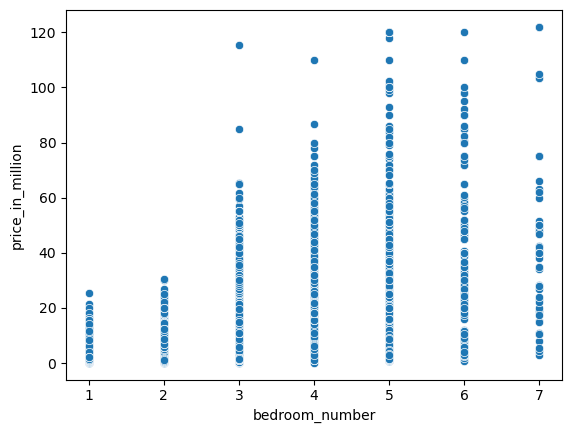

In [67]:
sns.scatterplot(data_cleaned, x='bedroom_number', y='price_in_million')

In [68]:
data_cleaned['area'].unique()

array([ 185,  100,  120,  111,  140,  200,  147,  175,  112,  225,  242,
        180,   96,  276,  210,  223,  174,  115,  320,  118,  202,   95,
        155,   70,  270,  360,  300,  177,  135,  250,  145,  114,  165,
        150,  170,  157,  315,  160,  196,   87,  220,  290,  190,  260,
         90,  218,   88,  280,  272,  130,  195,  205,  154,  121,  230,
        168,  191,  125,  275,  239,  153,  110,  184,  179,  245,  158,
        236,   63,   40,   45,  211,   60,  164,  116,  151,  133,  137,
        138,  176,  142,  183,  159,  178,  141,  152,  129,  201,  215,
         50,  126,  105,  136,  219,  254,  197,  194,  162,  204,  172,
        131,  106,  134,  163,  124,  132,  128,  186,   78,  161,   80,
        182,   86,  144,   81,  113,  208,  156,  139,  108,  104,   93,
        238,  207,  148,  101,   79,   75,  171,  167,  198,   56,  212,
        169,  187,  181,  166,  143,   76,  217,  103,  127,  122,  109,
        146,   57,  235,  214,  199,  226,   58,   

In [69]:
px.scatter(data_cleaned, x='area', y='price_in_million')

<Axes: xlabel='area', ylabel='price_in_million'>

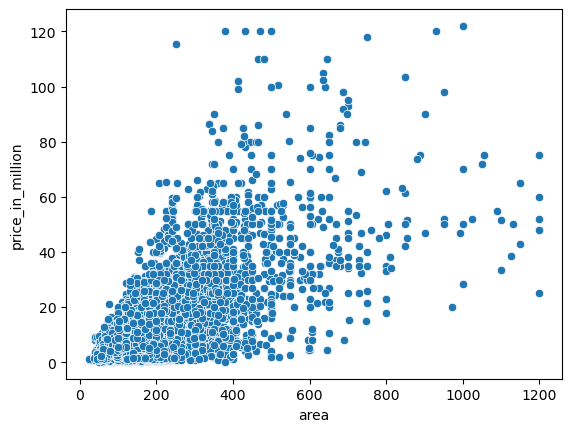

In [70]:
sns.scatterplot(data_cleaned, x='area', y='price_in_million')

<Axes: xlabel='bedroom_number', ylabel='price_in_million'>

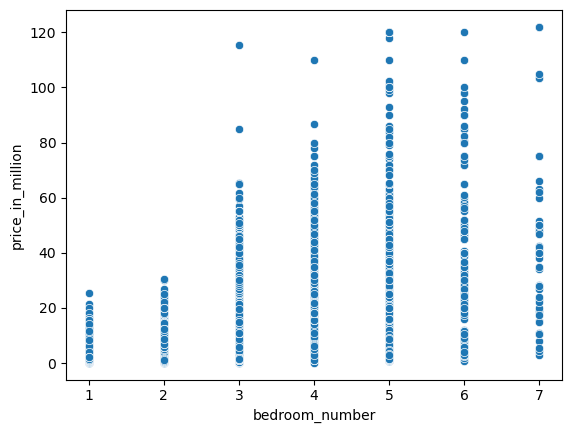

In [71]:
sns.scatterplot(data_cleaned, x='bedroom_number', y='price_in_million')

<Axes: xlabel='bathroom_number', ylabel='price_in_million'>

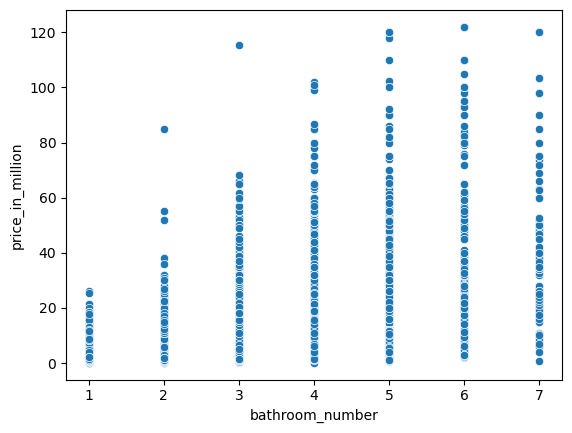

In [72]:
sns.scatterplot(data_cleaned, x='bathroom_number', y='price_in_million')

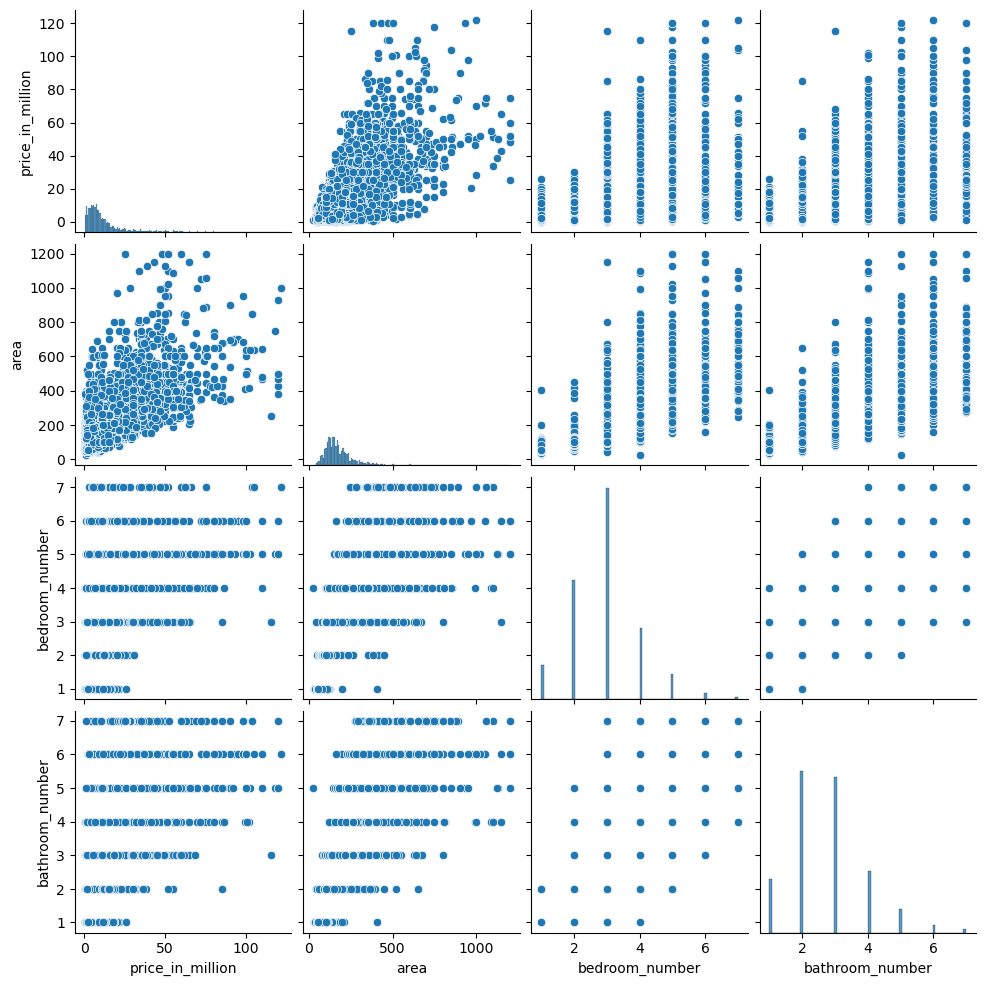

In [73]:
# Visualize relationships
sns.pairplot(data_cleaned[['price_in_million', 'area', 'bedroom_number', 'bathroom_number']])
plt.show()

In [74]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    12322 non-null  object 
 1   address                          12322 non-null  object 
 2   bedroom_number                   12322 non-null  int32  
 3   bathroom_number                  12322 non-null  int32  
 4   area                             12322 non-null  int32  
 5   description                      12322 non-null  object 
 6   link                             12322 non-null  object 
 7   titil                            12322 non-null  object 
 8   price_in_million                 12322 non-null  float64
 9   governorate                      12322 non-null  object 
 10  City                             12322 non-null  object 
 11  address_only                     12322 non-null  object 
 12  price_of_squre_met

Which governorate is the most expensive in housing price?


In [75]:
average_price_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].mean()
most_expensive_city = average_price_by_governorate.idxmax()  # Get the index (governorate name) with the maximum average price
print(f"The most expensive city in terms of housing price is: {most_expensive_city}")

The most expensive city in terms of housing price is:  North Coast


In [76]:
average_price_by_city_p = data_cleaned.groupby('governorate')['price_in_million'].mean()
# Sort the cities based on average price in descending order
sorted_cities_p = average_price_by_city_p.sort_values(ascending=False)
print("Cities ordered by average housing price:")
print(sorted_cities_p)

Cities ordered by average housing price:
governorate
 North Coast    13.129691
 Cairo          10.864350
 Giza           10.518993
 Suez            6.549840
 Red Sea         6.251300
 Alexandria      5.595232
Name: price_in_million, dtype: float64


In [77]:
average_price_by_city = data_cleaned.groupby('governorate')['price_in_million'].mean()
# Sort the cities based on average price in descending order
sorted_cities = average_price_by_city.sort_values(ascending=False)
print("Cities ordered by average housing price:")
print(sorted_cities)

Cities ordered by average housing price:
governorate
 North Coast    13.129691
 Cairo          10.864350
 Giza           10.518993
 Suez            6.549840
 Red Sea         6.251300
 Alexandria      5.595232
Name: price_in_million, dtype: float64


In [78]:
price_range_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].agg(['min', 'max'])
print("Price range for each governorate:")
print(price_range_by_governorate)

Price range for each governorate:
                min      max
governorate                 
 Alexandria   1.400   28.680
 Cairo        0.100  122.000
 Giza         0.185   85.000
 North Coast  0.116  120.000
 Red Sea      0.825   43.775
 Suez         0.350   35.000


In [79]:
average_price_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].mean().reset_index()

fig = px.bar(average_price_by_governorate, x='governorate', y='price_in_million', 
             title='Average Price by Governorate')

fig.show()


In [80]:
price_range_by_city = data_cleaned.groupby('City')['price_in_million'].agg(['min', 'max'])
print("Price range for each City:")
print(price_range_by_city)

Price range for each City:
                                  min         max
City                                             
 6 October City                0.2700   50.000000
 Al Ain Al Sokhna              0.3500   35.000000
 Al Alamein                    0.1160   52.000000
 Hay El Maadi                  0.6192   40.000000
 Hay Sharq                     1.4000   28.680000
 Hurghada                      0.8250   43.775000
 Mokattam                      1.5525   80.000000
 Mostakbal City - Future City  0.3000   61.786029
 New Alamein City              0.2350   56.234458
 New Cairo City                0.1000  122.000000
 New Capital City              0.2605   37.960000
 New Heliopolis                0.5650   35.000000
 Qesm Ad Dabaah                0.5500  102.148041
 Qesm Marsa Matrouh            0.5120  120.000000
 Ras Al Hekma                  0.2880   50.000000
 Sheikh Zayed City             0.1850   85.000000
 Shorouk City                  0.2660   34.000000
 Sidi Abdel Rahman     

Which property type is most expensive ?


In [81]:
average_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean()
most_expensive_property_type = average_price_by_property_type.idxmax()  # Get the index (property type) with the maximum average price
print(f"The most expensive property type is: {most_expensive_property_type}")

The most expensive property type is: Villa


In [82]:
average_price_by_property_type1 = data_cleaned.groupby('property_type')['price_in_million'].mean()
# Sort the property types based on average price in descending order
sorted_property_types = average_price_by_property_type1.sort_values(ascending=False)
print("Property types ordered by average housing price:")
print(sorted_property_types)

Property types ordered by average housing price:
property_type
Villa         24.232617
Twin House    22.290737
Townhouse     16.163265
Penthouse     11.615889
Duplex        11.563511
Chalet         7.793012
Apartment      6.446246
Name: price_in_million, dtype: float64


In [83]:
average_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean()
# Sort the property types based on average price in descending order
sorted_property_types = average_price_by_property_type.sort_values(ascending=False)
print("Property types ordered by average housing price:")
print(sorted_property_types)

Property types ordered by average housing price:
property_type
Villa         24.232617
Twin House    22.290737
Townhouse     16.163265
Penthouse     11.615889
Duplex        11.563511
Chalet         7.793012
Apartment      6.446246
Name: price_in_million, dtype: float64


In [84]:
average_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean().reset_index()
fig = px.bar(average_price_by_property_type, x='property_type', y='price_in_million', 
             title='Average Price by Property Type')
fig.show()

Average Price by Property Type:
 property_type
Villa         24.232617
Twin House    22.290737
Townhouse     16.163265
Penthouse     11.615889
Duplex        11.563511
Chalet         7.793012
Apartment      6.446246
Name: price_in_million, dtype: float64
Average Price by Governorate:
 governorate
 North Coast    13.129691
 Cairo          10.864350
 Giza           10.518993
 Suez            6.549840
 Red Sea         6.251300
 Alexandria      5.595232
Name: price_in_million, dtype: float64


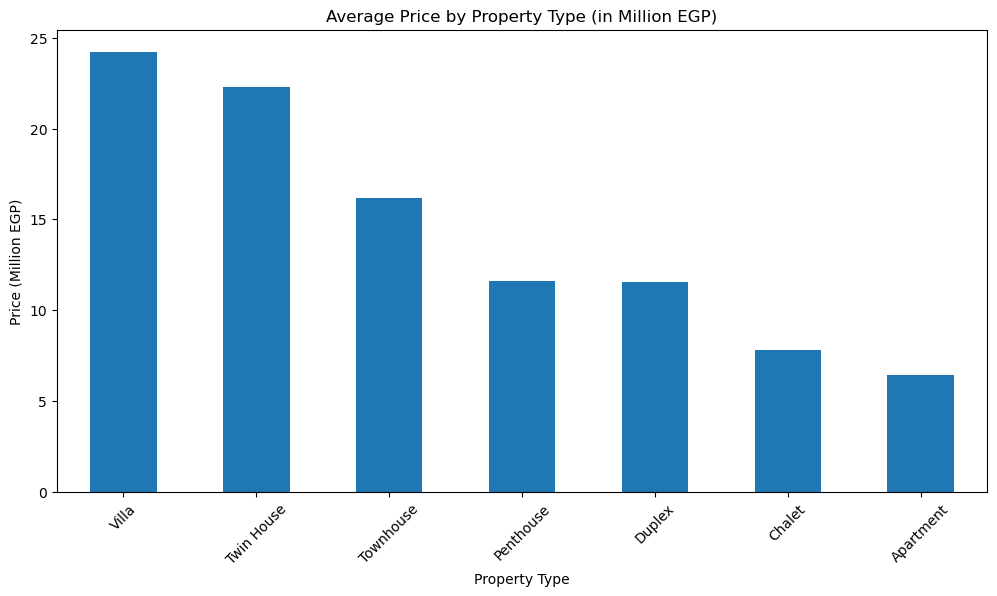

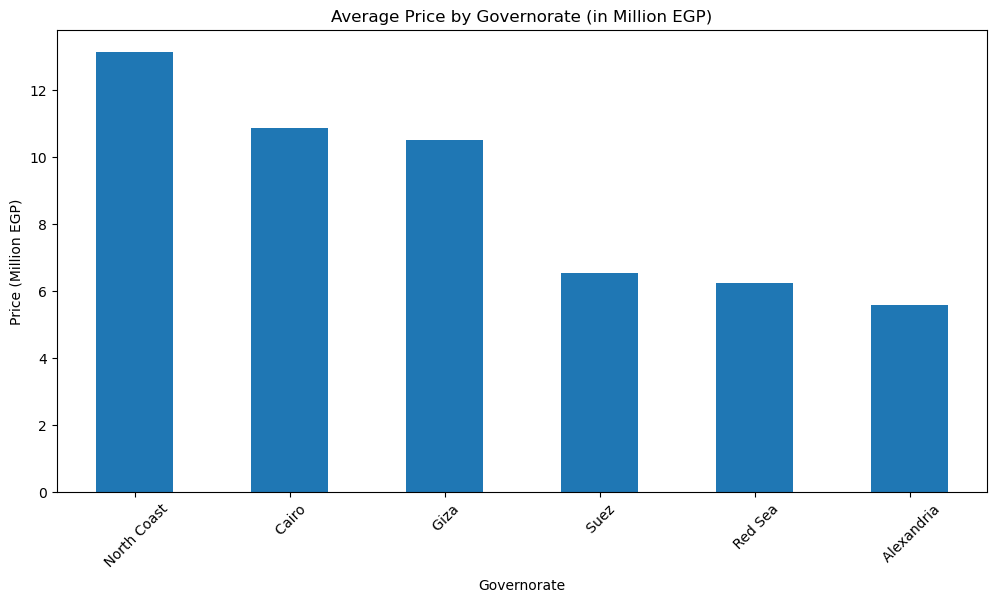

In [85]:
# Calculate the average price for each property type
avg_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean().sort_values(ascending=False)
print("Average Price by Property Type:\n", avg_price_by_property_type)

# Calculate the average price for each governorate
avg_price_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].mean().sort_values(ascending=False)
print("Average Price by Governorate:\n", avg_price_by_governorate)

# Visualize the average price by property type
plt.figure(figsize=(12, 6))
avg_price_by_property_type.plot(kind='bar')
plt.title('Average Price by Property Type (in Million EGP)')
plt.ylabel('Price (Million EGP)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()

# Visualize the average price by governorate
plt.figure(figsize=(12, 6))
avg_price_by_governorate.plot(kind='bar')
plt.title('Average Price by Governorate (in Million EGP)')
plt.ylabel('Price (Million EGP)')
plt.xlabel('Governorate')
plt.xticks(rotation=45)
plt.show()


In [86]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    12322 non-null  object 
 1   address                          12322 non-null  object 
 2   bedroom_number                   12322 non-null  int32  
 3   bathroom_number                  12322 non-null  int32  
 4   area                             12322 non-null  int32  
 5   description                      12322 non-null  object 
 6   link                             12322 non-null  object 
 7   titil                            12322 non-null  object 
 8   price_in_million                 12322 non-null  float64
 9   governorate                      12322 non-null  object 
 10  City                             12322 non-null  object 
 11  address_only                     12322 non-null  object 
 12  price_of_squre_met

In [87]:
# Remove leading and trailing spaces from the 'property_type' column
data_cleaned['property_type'] = data_cleaned['property_type'].str.strip()

# Remove leading and trailing spaces from other relevant text columns as needed
data_cleaned['governorate'] = data_cleaned['governorate'].str.strip()
data_cleaned['City'] = data_cleaned['City'].str.strip()

# Optional: Verify the changes
data_cleaned.head()


property_type                                            address  \
0     Apartment     Stanley Bridge, Stanley, Hay Sharq, Alexandria   
1     Apartment    Ismail Serry St., Smouha, Hay Sharq, Alexandria   
2     Apartment    Ismail Serry St., Smouha, Hay Sharq, Alexandria   
3     Apartment         Al Geish Road, Glim, Hay Sharq, Alexandria   
4     Apartment  14th of May Bridge Road, Smouha, Hay Sharq, Al...   

   bedroom_number  bathroom_number  area  \
0               3                3   185   
1               2                1   100   
2               2                1   100   
3               2                1   120   
4               2                1   111   

                                        description  \
0                   Apartment for sale 185m Stanley   
1   Apartment for sale in Smouha (Ismail Serry St.)   
2   Apartment for sale in Smouha (Ismail Serry St.)   
3  Licensed apartment - The view is open to the sea   
4       Own your apartment at Smouha Class Compound   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
1  https://www.propertyfinder.eg/en/plp/buy/apart...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil  price_in_million  \
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...              7.20   
1  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.60   
2  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.60   
3  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.60   
4  Apartment - 2 Bedrooms - 1 Bathroom for sale i...              2.45   

  governorate       City                     address_only  \
0  Alexandria  Hay Sharq          Stanley Bridge, Stanley   
1  Alexandria  Hay Sharq         Ismail Serry St., Smouha   
2  Alexandria  Hay Sharq         Ismail Serry St., Smouha   
3  Alexandria  Hay Sharq              Al Geish Road, Glim   
4  Alexandria  Hay Sharq  14th of May Bridge Road, Smouha   

   price_of_squre_meter_in_million  
0                         0.038919  
1                         0.026000  
2                         0.026000  
3                         0.021667  
4                         0.022072

In [144]:
data_cleaned.to_csv('data_cleaned.csv')

##  Modeling 

In [88]:
# Drop useless features

df5= data_cleaned.drop(columns=['address','description','link','titil','address_only','price_of_squre_meter_in_million'], axis=1)

In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     12322 non-null  object 
 1   bedroom_number    12322 non-null  int32  
 2   bathroom_number   12322 non-null  int32  
 3   area              12322 non-null  int32  
 4   price_in_million  12322 non-null  float64
 5   governorate       12322 non-null  object 
 6   City              12322 non-null  object 
dtypes: float64(1), int32(3), object(3)
memory usage: 625.7+ KB


In [90]:
# Apply the preprocessing to  dataset
X = df5.drop(columns=['price_in_million'])  
y = df5['price_in_million']  

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    12322 non-null  object
 1   bedroom_number   12322 non-null  int32 
 2   bathroom_number  12322 non-null  int32 
 3   area             12322 non-null  int32 
 4   governorate      12322 non-null  object
 5   City             12322 non-null  object
dtypes: int32(3), object(3)
memory usage: 529.5+ KB


In [92]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [93]:
# Apply StandardScaler to the numerical features
scaler = StandardScaler()
X_train_num = X_train[['area','bedroom_number','bathroom_number']]
X_test_num = X_test[['area','bedroom_number','bathroom_number']]


In [94]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [95]:
# Convert the scaled arrays back to DataFrames ( for easier handling)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['area','bedroom_number','bathroom_number'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['area','bedroom_number','bathroom_number'])

In [96]:
# Select categorical columns for encoding
X_train_cat = X_train[['property_type','governorate', 'City']]
X_test_cat = X_test[['property_type','governorate','City']]

In [97]:
# Apply OneHotEncoder to the categorical features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [98]:

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()

In [99]:
# Convert the encoded arrays back to DataFrames (optional, for easier handling)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['property_type','governorate','City']))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['property_type','governorate','City']))

In [100]:
# Combine the scaled numerical features with the encoded categorical features
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [101]:
model = LinearRegression()
model.fit(X_train_final, y_train)

train_r2 = model.score(X_train_final, y_train)
test_r2  = model.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.5581735789835784
Testing Accuracy: 0.5846623517958897


In [102]:
# Train a Random Forest model on the prepared training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train_final, y_train)

# Predict on the test data
y_pred = model.predict(X_test_final)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 52.390063874562166


In [103]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_final, y_train)
y_pred = XGB_model.predict(X_test_final)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])


Metrics
MAE_XGB    4.438764
MSE_XGB   55.772894
RMSE_XGB   7.468125

In [104]:
scores = cross_val_score(XGB_model, X_train_final, y_train, cv=5)
print(np.sqrt(scores))

[0.75986388 0.71114312 0.79810611 0.74820956 0.76319187]


In [105]:
r2_score(y_train, XGB_model.predict(X_train_final))

0.8149432577732723

In [106]:
r2_score(y_test, XGB_model.predict(X_test_final))

0.630235296194282

In [107]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [70,100, 200],
    'regressor__learning_rate': [0.01, 0.1,0.13],
    'regressor__max_depth': [3, 5, 7]
}

grid = GridSearchCV(model, params, cv=7)
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(X_train_final, y_train)
test_r2  = grid.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.13, 'regressor__max_depth': 5, 'regressor__n_estimators': 70}
Best Score: 0.6094452788069915
Training Accuracy: 0.6992136328017979
Testing Accuracy: 0.6509598381319557


In [108]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_final, y_train)

GradientBoostingRegressor()

In [109]:
y_pred = Gradient_model.predict(X_test_final)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

Metrics
MAE_gradient    4.658866
MSE_gradient   52.905379
RMSE_gradient   7.273608

In [110]:
scores = cross_val_score(Gradient_model, X_train_final, y_train, cv=5)
print(np.sqrt(scores))

[0.76991891 0.75466005 0.78877463 0.77350386 0.78084497]


In [111]:
r2_score(y_test, Gradient_model.predict(X_test_final))

0.6492464296324654

In [112]:

dt = DecisionTreeRegressor()

dt.fit(X_train_final, y_train)

train_r2 = dt.score(X_train_final, y_train)
test_r2  = dt.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.929970839361754
Testing Accuracy: 0.41495406713244776


In [113]:
dt = DecisionTreeRegressor()


In [114]:
cv = cross_validate(dt, X_train_final, y_train, cv=10, return_train_score=True, scoring='r2', return_estimator=True)

In [115]:
index_max = cv['test_score'].argmax()
cv['estimator'][index_max]

DecisionTreeRegressor()

In [116]:
cv['estimator'][index_max].score(X_train_final, y_train)

0.880373316608172

In [117]:
cv['estimator'][index_max].score(X_test_final, y_test)

0.5112299032718672

In [118]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': [4, 6, 8,13,15],
    'min_samples_leaf': [200, 20000],
    'max_leaf_nodes': [10, 20],
    'criterion': ('squared_error', 'friedman_mse')
}

grid = GridSearchCV(dt, params)
grid.fit(X_train_final, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse'),
                         'max_depth': [4, 6, 8, 13, 15],
                         'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [200, 20000]})

In [119]:
grid.score(X_test_final, y_test)

0.5359482079774114

In [120]:
grid.score(X_train_final, y_train)

0.5054105605715995

In [121]:


# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV with Random Forest
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_final, y_train)

# Get the best parameters and evaluate the best model
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test_final)

# Evaluate the tuned Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Parameters: {best_params}")
print(f" RMSE: {rmse_best_rf}, R²: {r2_best_rf}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\s

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
 RMSE: 7.038363971321228, R²: 0.6715678128447321


In [122]:
# Lasso Regression
lasso = Lasso(alpha=0.000007)
lasso.fit(X_train_final, y_train)
lasso_train_pred = lasso.predict(X_train_final)
lasso_test_pred = lasso.predict(X_test_final)

print("\nLasso Regression:")
print(f"Training R² Score: {r2_score(y_train, lasso_train_pred):.4f}")
print(f"Testing R² Score: {r2_score(y_test, lasso_test_pred):.4f}")


Lasso Regression:
Training R² Score: 0.5582
Testing R² Score: 0.5847


c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.226e+04, tolerance: 1.410e+02



In [123]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [50,100],
    'regressor__learning_rate': [0.001, 0.1],
    'regressor__max_depth': [3, 5, 7,10,13]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(X_train_final, y_train)
test_r2  = grid.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}
Best Score: 0.6083316179907859
Training Accuracy: 0.7048825815329605
Testing Accuracy: 0.6445372719536654


In [124]:
initial_pca_components = 5
pca = PCA(n_components=initial_pca_components)
x_train_pca = pca.fit_transform(X_train_final)
x_test_pca = pca.transform(X_test_final)

In [125]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [100, 1000],
    'regressor__learning_rate': [0.001, 0.1],
    'regressor__max_depth': [3, 5, 7,10]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(x_train_pca, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(x_train_pca, y_train)
test_r2  = grid.score(x_test_pca, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}
Best Score: 0.5676958119460955
Training Accuracy: 0.7300520380305633
Testing Accuracy: 0.6253651530448485


In [126]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train_final, y_train)


RandomForestRegressor(random_state=42)

In [127]:
y_pred = model.predict(X_test_final)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 4.309804572039077
R-squared: 0.6526628812840883


In [128]:
model.score(X_train_final, y_train), model.score(X_test_final, y_test)

(0.8925521410121192, 0.6526628812840883)

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('regressor', DecisionTreeRegressor())])

params = {
    'regressor__max_depth': [5, 10, 15],         # Shallower depth
    'regressor__min_samples_leaf': [10, 20, 50],  # Minimum samples in leaves
    'regressor__min_samples_split': [5, 10, 20],  # Minimum samples to split nodes
    'regressor__criterion': ['squared_error', 'friedman_mse']
}

grid = GridSearchCV(model, params, cv=5)  # Using cross-validation
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'regressor__criterion': 'friedman_mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 20, 'regressor__min_samples_split': 10}
Best Score: 0.5827243726911493


In [130]:
y_train_pred = grid.predict(X_train_final)
y_test_pred = grid.predict(X_test_final)

# Print evaluation metrics
print(f"Training R² Score: {r2_score(y_train, y_train_pred)}")
print(f"Testing R² Score: {r2_score(y_test, y_test_pred)}")

print(f"Training MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred)}")

Training R² Score: 0.6401079965604749
Testing R² Score: 0.6198977466946546
Training MSE: 51.46904342292297
Testing MSE: 57.33214291392636


Training Score: 0.8663962034818774
Testing Score: 0.6801444241933164


In [131]:


# Define base models
base_models = [
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor())
]

# Define meta-model
meta_model = Ridge()

# Create stacking regressor
model = Pipeline(steps=[
    ('regressor', StackingRegressor(estimators=base_models, final_estimator=meta_model))
])

# Fit the model
model.fit(X_train_final, y_train)

# Evaluate the model
print("Training Score:", model.score(X_train_final, y_train))
print("Testing Score:", model.score(X_test_final, y_test))


Training Score: 0.8285751238543335
Testing Score: 0.6697947846868235


In [132]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5, 7]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(X_train_final, y_train)
test_r2  = grid.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best Score: 0.6085898626470161
Training Accuracy: 0.659814306419973
Testing Accuracy: 0.6524847844014874


In [133]:

dt.fit(X_train_final, y_train)

train_r2 = dt.score(X_train_final, y_train)
test_r2  = dt.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.929970839361754
Testing Accuracy: 0.4362382274752634


In [134]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_final, y_train)
ridge_train_pred = ridge.predict(X_train_final)
ridge_test_pred = ridge.predict(X_test_final)

print("Ridge Regression:")
print(f"Training R² Score: {r2_score(y_train, ridge_train_pred):.4f}")
print(f"Testing R² Score: {r2_score(y_test, ridge_test_pred):.4f}")

Ridge Regression:
Training R² Score: 0.5582
Testing R² Score: 0.5846


In [135]:

# Define a range of alpha values
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge with cross-validation
ridge_cv = GridSearchCV(Ridge(), alpha_values, cv=5)
ridge_cv.fit(X_train_final, y_train)
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Ridge CV Score: {ridge_cv.best_score_:.4f}")

# Lasso with cross-validation
lasso_cv = GridSearchCV(Lasso(), alpha_values, cv=5)
lasso_cv.fit(X_train_final, y_train)
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best Lasso CV Score: {lasso_cv.best_score_:.4f}")

Best Ridge Alpha: 1
Best Ridge CV Score: 0.5536
Best Lasso Alpha: 0.01
Best Lasso CV Score: 0.5530


In [139]:
model = Pipeline(steps=[
    ('regressor', VotingRegressor(estimators=[
        ('ridge', Ridge()),
        ('decision_tree', DecisionTreeRegressor()),
        ('random_forest', RandomForestRegressor())
    ]))
])

model.fit(X_train_final, y_train)

print("Training Score:", model.score(X_train_final, y_train))
print("Testing Score:", model.score(X_test_final, y_test))

Training Score: 0.8658534680540666
Testing Score: 0.6326942895008181


pickle

In [362]:
import pickle

#  `model` is trained model
filename = 'model.pkl'

# Save the model to a file
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to model.pkl


In [364]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['encoder.pkl']

In [142]:
# Save the encoder object itself, not the transformed data
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [143]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [371]:
# Example new data
new_data = pd.DataFrame({
    'area': [600],
    'bedroom_number': [6],
    'bathroom_number': [3],
    'property_type': ['Villa'],
    'governorate': ['Cairo'],
    'City': ['New Cairo City']
})


In [372]:
# Encode categorical features
new_data_encoded = encoder.transform(new_data[['property_type', 'governorate', 'City']])

# Scale numerical features
new_data_scaled = scaler.transform(new_data[['area', 'bedroom_number', 'bathroom_number']])

# Combine the scaled numerical data with the encoded categorical data
combined_features = np.hstack((new_data_scaled, new_data_encoded.toarray()))

# Create a DataFrame for the combined features with the appropriate column names
feature_names = (list(X_train_final[['area', 'bedroom_number', 'bathroom_number']].columns) +
                 list(encoder.get_feature_names_out(['property_type', 'governorate', 'City'])))

new_data_prepared = pd.DataFrame(combined_features, columns=feature_names)


In [373]:
# Make a prediction with the trained model
prediction = model.predict(new_data_prepared)

# Output the prediction
print(f"The predicted price (in million) is: {prediction[0]}")

The predicted price (in million) is: 31.74593130894897
